In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from pipeline import run_pipeline


In [7]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

task_type = "classification"
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [11]:
numerical_cols = X_train.columns.tolist()
categorical_cols = []
numerical_cols

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [12]:
model = LogisticRegression(max_iter=1000)
# model = RandomForestClassifier(random_state=42)


In [15]:
metrics, errors = run_pipeline(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    model=model,
    numerical_cols=numerical_cols,
    categorical_cols=categorical_cols,
    task_type=task_type
)
metrics

{'train': {'accuracy': 0.989010989010989,
  'precision': 0.9861111111111112,
  'recall': 0.9964912280701754,
  'f1': 0.9912739965095986},
 'test': {'accuracy': 0.9824561403508771,
  'precision': 0.9861111111111112,
  'recall': 0.9861111111111112,
  'f1': 0.9861111111111112}}

In [20]:
errors.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y_true,y_pred
count,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,14.135000,20.390000,93.120000,620.25000,0.094535,0.125500,0.089395,0.044795,0.176700,0.064535,...,111.900000,810.650000,0.137550,0.387200,0.340950,0.129400,0.288800,0.102650,0.500000,0.500000
std,0.473762,6.505382,3.804234,51.12382,0.008719,0.003536,0.016271,0.008337,0.014849,0.001591,...,2.262742,2.474874,0.005020,0.046669,0.089166,0.012587,0.042285,0.000495,0.707107,0.707107
min,13.800000,15.790000,90.430000,584.10000,0.088370,0.123000,0.077890,0.038900,0.166200,0.063410,...,110.300000,808.900000,0.134000,0.354200,0.277900,0.120500,0.258900,0.102300,0.000000,0.000000
25%,13.967500,18.090000,91.775000,602.17500,0.091453,0.124250,0.083643,0.041847,0.171450,0.063972,...,111.100000,809.775000,0.135775,0.370700,0.309425,0.124950,0.273850,0.102475,0.250000,0.250000
50%,14.135000,20.390000,93.120000,620.25000,0.094535,0.125500,0.089395,0.044795,0.176700,0.064535,...,111.900000,810.650000,0.137550,0.387200,0.340950,0.129400,0.288800,0.102650,0.500000,0.500000
75%,14.302500,22.690000,94.465000,638.32500,0.097617,0.126750,0.095147,0.047743,0.181950,0.065098,...,112.700000,811.525000,0.139325,0.403700,0.372475,0.133850,0.303750,0.102825,0.750000,0.750000
max,14.470000,24.990000,95.810000,656.40000,0.100700,0.128000,0.100900,0.050690,0.187200,0.065660,...,113.500000,812.400000,0.141100,0.420200,0.404000,0.138300,0.318700,0.103000,1.000000,1.000000


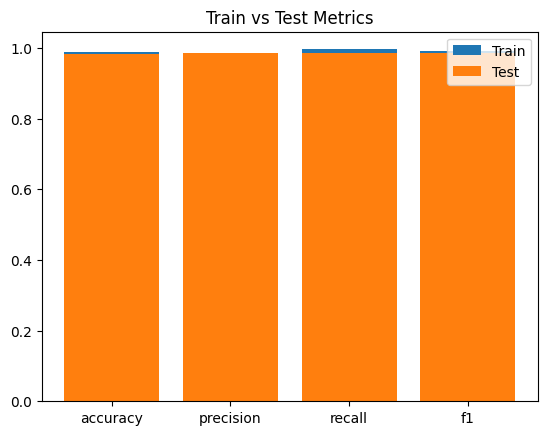

In [23]:
train_metrics = metrics["train"]
test_metrics = metrics["test"]

labels = list(train_metrics.keys())
train_vals = list(train_metrics.values())
test_vals = list(test_metrics.values())

plt.figure()
plt.bar(labels, train_vals, label="Train")
plt.bar(labels, test_vals,label="Test")
plt.legend()
plt.title("Train vs Test Metrics")
plt.show()


In [31]:
numerical_cols


['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

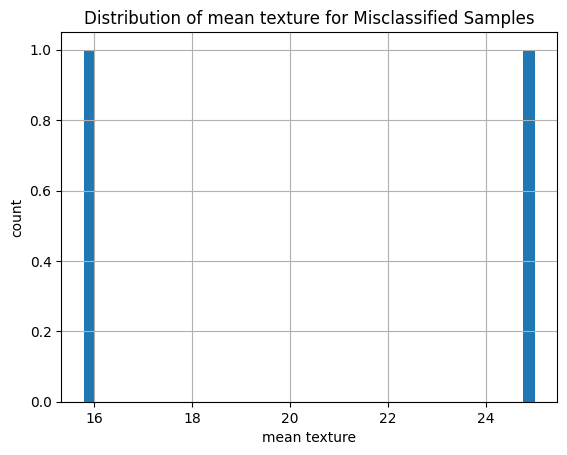

In [39]:
feature = numerical_cols[1]

plt.figure()
errors[feature].hist(bins=40)
plt.title(f"Distribution of {feature} for Misclassified Samples")
plt.xlabel(feature)
plt.ylabel("count")
plt.show()


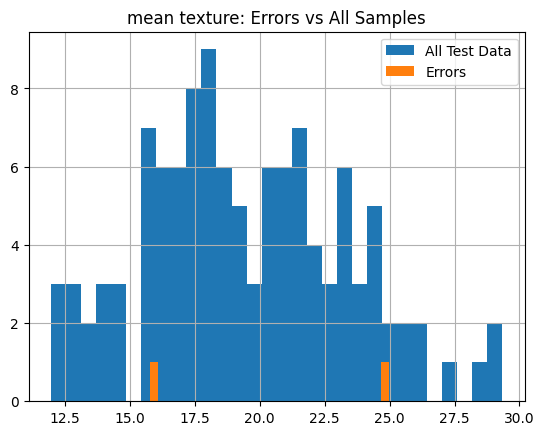

In [41]:
plt.figure()
X_test[feature].hist(bins=30, label="All Test Data")
errors[feature].hist(bins=30,label="Errors")
plt.legend()
plt.title(f"{feature}: Errors vs All Samples")
plt.show()


In [42]:
rf_model = RandomForestClassifier(random_state=42)

rf_metrics, rf_errors = run_pipeline(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    model=rf_model,
    numerical_cols=numerical_cols,
    categorical_cols=categorical_cols,
    task_type=task_type
)

rf_metrics


{'train': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0},
 'test': {'accuracy': 0.956140350877193,
  'precision': 0.958904109589041,
  'recall': 0.9722222222222222,
  'f1': 0.9655172413793104}}

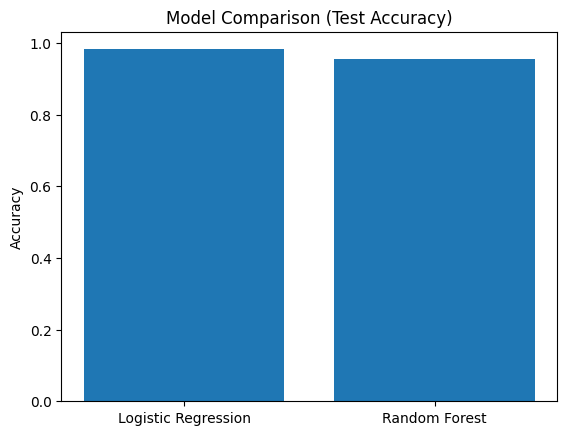

In [43]:
models = ["Logistic Regression", "Random Forest"]
test_acc = [
    metrics["test"]["accuracy"],
    rf_metrics["test"]["accuracy"]
]

plt.figure()
plt.bar(models, test_acc)
plt.title("Model Comparison (Test Accuracy)")
plt.ylabel("Accuracy")
plt.show()
